# Example usage of Millefy: Attempting to use Bam files included with external data (`extdata`)!!

Where the BigWig files used in [the original notebook](https://nbviewer.org/github/yuifu/datascience-notebook-millefy/blob/90f30181e77657566bc2b87c0f70fa5118c4c9fb/examples/test_millefy.ipynb) are stored, I found there were also Bam files. Does millefy work with those since [the documentation](https://github.com/yuifu/millefy/blob/cf6cf0c8494df394b71702bfb928ef6bce2c7273/tutorial/Tutorial.md) says input can be Bam files in several places?

In [5]:
library(millefy)

Warning message:
“replacing previous import ‘IRanges::shift’ by ‘data.table::shift’ when loading ‘millefy’”
Warning message:
“replacing previous import ‘IRanges::distance’ by ‘destiny::distance’ when loading ‘millefy’”
Warning message:
“replacing previous import ‘data.table::first’ by ‘dplyr::first’ when loading ‘millefy’”
Warning message:
“replacing previous import ‘IRanges::desc’ by ‘dplyr::desc’ when loading ‘millefy’”
Warning message:
“replacing previous import ‘IRanges::slice’ by ‘dplyr::slice’ when loading ‘millefy’”
Warning message:
“replacing previous import ‘IRanges::intersect’ by ‘dplyr::intersect’ when loading ‘millefy’”
Warning message:
“replacing previous import ‘data.table::last’ by ‘dplyr::last’ when loading ‘millefy’”
Warning message:
“replacing previous import ‘IRanges::union’ by ‘dplyr::union’ when loading ‘millefy’”
Warning message:
“replacing previous import ‘data.table::between’ by ‘dplyr::between’ when loading ‘millefy’”
Warning message:
“replacing previous import

## Input files

### BigWig files and Bam files (scRNA-seq samples)

Oh wait, the external data contains some bam files according to [here](https://github.com/yuifu/millefy/blob/cf6cf0c8494df394b71702bfb928ef6bce2c7273/R/millefy-bamImport.R#L10) so I can try to test using bam files and not BigWig files with the external data supplied in the package.

In [7]:
# Path to bigWig files
bwfiles = Sys.glob(file.path(system.file("extdata", package="millefy"), "*.bw"))
bamfiles = Sys.glob(file.path(system.file("extdata/bam", package="millefy"), "*.bam"))
# FROM CODE at https://github.com/yuifu/millefy/blob/cf6cf0c8494df394b71702bfb928ef6bce2c7273/R/millefy-bamImport.R#L10 : bam_files = Sys.glob(file.path(system.file("extdata/bam", package="millefy"), "*.bam"))
print(bwfiles)
print(bamfiles)

[1] "/srv/conda/envs/notebook/lib/R/library/millefy/extdata/RamDA_00h_A06.bw"
[2] "/srv/conda/envs/notebook/lib/R/library/millefy/extdata/RamDA_00h_A07.bw"
[3] "/srv/conda/envs/notebook/lib/R/library/millefy/extdata/RamDA_00h_A08.bw"
[4] "/srv/conda/envs/notebook/lib/R/library/millefy/extdata/RamDA_12h_A06.bw"
[5] "/srv/conda/envs/notebook/lib/R/library/millefy/extdata/RamDA_12h_A07.bw"
[6] "/srv/conda/envs/notebook/lib/R/library/millefy/extdata/RamDA_12h_A08.bw"
 [1] "/srv/conda/envs/notebook/lib/R/library/millefy/extdata/bam/RamDA_00h_A04.uniq.q40.chr19.bam"
 [2] "/srv/conda/envs/notebook/lib/R/library/millefy/extdata/bam/RamDA_00h_A05.uniq.q40.chr19.bam"
 [3] "/srv/conda/envs/notebook/lib/R/library/millefy/extdata/bam/RamDA_00h_A06.uniq.q40.chr19.bam"
 [4] "/srv/conda/envs/notebook/lib/R/library/millefy/extdata/bam/RamDA_00h_A07.uniq.q40.chr19.bam"
 [5] "/srv/conda/envs/notebook/lib/R/library/millefy/extdata/bam/RamDA_00h_A08.uniq.q40.chr19.bam"
 [6] "/srv/conda/envs/notebook/lib/R/

In [8]:
# Group labels for bam files (same length as bamfiles)
groups = c("00h", "00h", "00h", "00h", "00h", "72h", "72h", "72h", "72h", "72h")

In [9]:
# Color labels for bigWig files (A named vector with the same length as the number of kinds of \\code{groups})
color_labels <- colorRampPalette(c("yellow", "red"))(length(unique(groups))+1)[1:length(unique(groups))]
names(color_labels)  <- unique(groups)
print(color_labels)

      00h       72h 
"#FFFF00" "#FF7F00" 


### GTF file (gene models)

In [10]:
# Load gene models (It takes a little time)
path_gtf = system.file("extdata", "example.gtf", package="millefy")
dt_gtf_exon <- gtfToDtExon(path_gtf)

### Set tracks

In [16]:
# Set tracks
## Single-cell track
max_value = 700
scTrackBw <- list(path_bam_files = bamfiles, groups = groups, group_colors = color_labels, max_value = max_value, isBw=FALSE, normFactors = calcBamNormFactors(bamfiles))

## Gene annotation track
geneTrack1 <- list(path_gtf = path_gtf, dt_gtf = dt_gtf_exon, label = "GENCODE")


# Prepare arguments for millefyPlot()
## List of tracks
tdlist <- list(scTrackBw, geneTrack1)

## List of track types
tt <- c("sc", "gene")

## List of track hights
heights = c(12, 2)

Note the changes relative tutorial with BigWig files:

- `isBw` is set to `FALSE`
- `normFactors = calcBamNormFactors(bamfiles)` is included based on other encountering `error `Error in mat[i, ] <- cov * normFactor[i]: replacement has length zero` when I try to plot using BAM files data. [Documentation contains that example how to set](https://github.com/yuifu/millefy/blob/cf6cf0c8494df394b71702bfb928ef6bce2c7273/man/calcBamNormFactors.Rd#L23C1-L23C43) that I found searching the repo with the term 'normFactor'.
- `max_value` lowered or with this data, the intensity of banding heatmap is very light

### Set a location

In [17]:
# Location to visualize
chr =  "chr19" # character
start = 5824708 # integer
end = 5845478 # integer

text_main = "mESC 00h, 72h (FROM Bam files!!!)"

## Plot

### Default
When we don't set the sc_sort_destiny parameter (default), the order of single cells is the order of bwfiles.



[1] "Begin millefyPlot: 2023-11-21 21:26:42.694956"
[1] "title" "sc"    "avg"   "gene"  "axis" 
[1] "Start importing BAM: 2023-11-21 21:26:42.719163"
[1] "End importing BAM: 2023-11-21 21:26:45.593525"
[1] "Finished millefyPlot: 2023-11-21 21:26:45.767093"


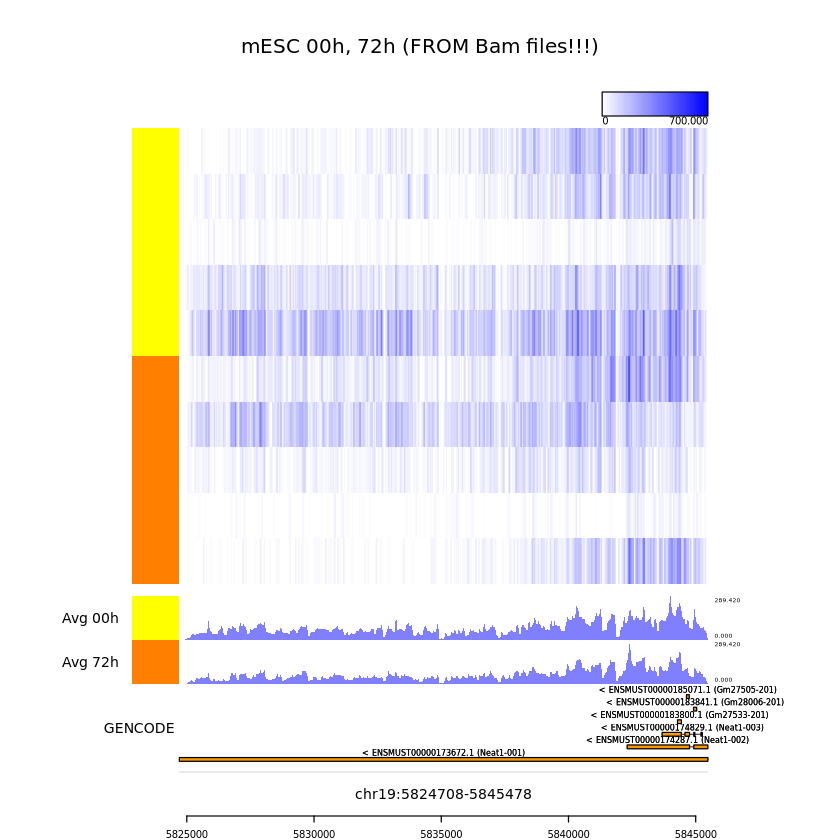

In [18]:
l <- millefyPlot(track_data=tdlist, track_type=tt, heights=heights,
          sc_type = "heatmap",
          chr = chr, start = start, end = end,
          sc_avg = TRUE, sc_avg_height = 1,
          title = text_main)

**Yes, the included BAM files in the external data (`extdata`) can be used with some appropriate adjustments.** 

Some threads in the issues, such as [here](https://github.com/yuifu/millefy/issues/3#issuecomment-1276280011) seeme to imply use of BAM files wasn't as direct and to use BigWig files. Maybe back then it wasn't implemented (but I don't think that was the case because the last versions proceeds parts of that discussion). Anyway, what if you had a reason to be concerned about how the BAM files data was being handled and wanted to convert to BigWig yourself first. The next section illustrates how you can to the conversion to BigWig using the BAM files stored in `extdata`. 
 

# Example using BigWig files made from using deepTools' `bamCoverage` for conversion first

This section covers doing much the same thing as the top section, but first converting to make BigWig files  with [deepTools](https://gensoft.pasteur.fr/docs/deepTools/3.4.1/content/installation.html#command-line-installation-without-pip) and use the converted BigWig files to do the plots.  
Why would it be inmportant to have options?

Having the abilities to control how the data in the BAM files may be important if what you are doing isn't what the standard approach that `calcBamNormFactors()` carries out see [here](https://github.com/yuifu/millefy/blob/cf6cf0c8494df394b71702bfb928ef6bce2c7273/man/calcBamNormFactors.Rd#L23C1-L23C43)).  
This may be useful in cases where you want more control over the normalization. For example, deepTools bamCoverage lets you use effective genome size as normalization and I don't think that Millefy makes this that easy to control. (Maybe I missed how to control it so far though?) For example, I had only collected mapped reads for certain regions of the chromosome using `samtools view` to keep file size managed and so I wanted to be able to use the filter constraints as the genome size settin as the mappable `effectiveGenomeSize`.

Install while in R kernel in MyBInder Session. (This next cell will take several minutes to run. On the order of close to five minutes.)

In [9]:
system("pip install deeptools")

Set up sending USAGE to a text file to be able to check installed.

In [10]:
system("deeptools > verify_installed.txt")

Verify pip worked, while in R kernel.

In [11]:
cat(paste0(readLines("verify_installed.txt"), collapse="\n")) # based on [R - how can I dump contents of file to console output? `cat` equivalent in R](https://stackoverflow.com/a/59799268/8508004)

usage: deeptools [-h] [--version]

deepTools is a suite of python tools particularly developed for the efficient analysis of
high-throughput sequencing data, such as ChIP-seq, RNA-seq or MNase-seq.

Each tool should be called by its own name as in the following example:

 $ bamCoverage -b reads.bam -o coverage.bw

If you find deepTools useful for your research please cite as:

Ramírez, Fidel, Devon P. Ryan, Björn Grüning, Vivek Bhardwaj, Fabian Kilpert,
Andreas S. Richter, Steffen Heyne, Friederike Dündar,
and Thomas Manke. 2016. "deepTools2: A next Generation Web Server for Deep-Sequencing
Data Analysis." Nucleic Acids Research, April. doi:10.1093/nar/gkw257.

[ Tools for BAM and bigWig file processing ]
    multiBamSummary         compute read coverages over bam files. Output used for plotCorrelation or plotPCA
    multiBigwigSummary      extract scores from bigwig files. Output used for plotCorrelation or plotPCA
    correctGCBias           corrects GC bias from bam file. Don't use 

In [12]:
getwd()

[1] "/home/jovyan"

In [13]:
system("cp -r /srv/conda/envs/notebook/lib/R/library/millefy/extdata/bam .")

In [14]:
system("mv bam bam2bw_extdata")

This next cell will demonstrate conversion of the BAM files works with deepTools' `bamCoverage` command now. The command uses a coarse `binSize` so that it will execute in a reasonable amount of time. (Like 45 seconds or so.)

In [15]:
# based on https://gensoft.pasteur.fr/docs/deepTools/3.4.1/content/tools/bamCoverage.html?highlight=bamcoverage#usage-example-for-chip-seq
# and https://github.com/yuifu/millefy/blob/cf6cf0c8494df394b71702bfb928ef6bce2c7273/tutorial/Tutorial.md under [Converting BAM to BigWig files using deepTools](https://github.com/yuifu/millefy/blob/cf6cf0c8494df394b71702bfb928ef6bce2c7273/tutorial/Tutorial.md#1-1-converting-bam-to-bigwig-files-using-deeptools)
# and size of mouse chromsome 19 (learned it was mouse in Millefy publication) as `effectiveGenomeSize` because bamCoverage documentation says 'The effective genome size is the portion of the genome that is mappable'
# Note because stdout isn't displayed in R kernel in Jupyter, command worked out over in terminal in the same session
system("bamCoverage --bam bam2bw_extdata/RamDA_00h_A04.uniq.q40.chr19.bam -o bam2bw_extdata/RamDA_00h_A04.uniq.q40.chr19.binsize200.cbw --binSize 200 --normalizeUsing RPGC  --effectiveGenomeSize 61420004")

To save time though, we'll get pre-converted equivalent data with a smaller `binSize` setting (`--binSize 15`). What we'll have when we get and unpack the pre-converted & archived data is the equivalent of running the following code:

```R
# based on https://gensoft.pasteur.fr/docs/deepTools/3.4.1/content/tools/bamCoverage.html?highlight=bamcoverage#usage-example-for-chip-seq
# and https://github.com/yuifu/millefy/blob/cf6cf0c8494df394b71702bfb928ef6bce2c7273/tutorial/Tutorial.md under [Converting BAM to BigWig files using deepTools](https://github.com/yuifu/millefy/blob/cf6cf0c8494df394b71702bfb928ef6bce2c7273/tutorial/Tutorial.md#1-1-converting-bam-to-bigwig-files-using-deeptools)
# and size of mouse chromsome 19 (learned it was mouse in Millefy publication) as `effectiveGenomeSize` because bamCoverage documentation says 'The effective genome size is the portion of the genome that is mappable'
# Note because stdout isn't displayed in R kernel in Jupyter, command worked out over in terminal in the same session
system("bamCoverage --bam bam2bw_extdata/RamDA_00h_A04.uniq.q40.chr19.bam -o bam2bw_extdata/RamDA_00h_A04.uniq.q40.chr19.bw --binSize 15 --normalizeUsing RPGC  --effectiveGenomeSize 61420004")
system("bamCoverage --bam bam2bw_extdata/RamDA_00h_A05.uniq.q40.chr19.bam -o bam2bw_extdata/RamDA_00h_A05.uniq.q40.chr19.bw --binSize 15 --normalizeUsing RPGC  --effectiveGenomeSize 61420004")
system("bamCoverage --bam bam2bw_extdata/RamDA_00h_A06.uniq.q40.chr19.bam -o bam2bw_extdata/RamDA_00h_A06.uniq.q40.chr19.bw --binSize 15 --normalizeUsing RPGC  --effectiveGenomeSize 61420004")
system("bamCoverage --bam bam2bw_extdata/RamDA_00h_A07.uniq.q40.chr19.bam -o bam2bw_extdata/RamDA_00h_A07.uniq.q40.chr19.bw --binSize 15 --normalizeUsing RPGC  --effectiveGenomeSize 61420004")
system("bamCoverage --bam bam2bw_extdata/RamDA_00h_A08.uniq.q40.chr19.bam -o bam2bw_extdata/RamDA_00h_A08.uniq.q40.chr19.bw --binSize 15 --normalizeUsing RPGC  --effectiveGenomeSize 61420004")
system("bamCoverage --bam bam2bw_extdata/RamDA_72h_A04.uniq.q40.chr19.bam -o bam2bw_extdata/RamDA_72h_A04.uniq.q40.chr19.bw --binSize 15 --normalizeUsing RPGC  --effectiveGenomeSize 61420004")
system("bamCoverage --bam bam2bw_extdata/RamDA_72h_A05.uniq.q40.chr19.bam -o bam2bw_extdata/RamDA_72h_A05.uniq.q40.chr19.bw --binSize 15 --normalizeUsing RPGC  --effectiveGenomeSize 61420004")
system("bamCoverage --bam bam2bw_extdata/RamDA_72h_A06.uniq.q40.chr19.bam -o bam2bw_extdata/RamDA_72h_A06.uniq.q40.chr19.bw --binSize 15 --normalizeUsing RPGC  --effectiveGenomeSize 61420004")
system("bamCoverage --bam bam2bw_extdata/RamDA_72h_A07.uniq.q40.chr19.bam -o bam2bw_extdata/RamDA_72h_A07.uniq.q40.chr19.bw --binSize 15 --normalizeUsing RPGC  --effectiveGenomeSize 61420004")
system("bamCoverage --bam bam2bw_extdata/RamDA_72h_A08.uniq.q40.chr19.bam -o bam2bw_extdata/RamDA_72h_A08.uniq.q40.chr19.bw --binSize 15 --normalizeUsing RPGC  --effectiveGenomeSize 61420004")
```

Run the next cell to get the pre-converted data with the equivalent of `--binSize 15`:

In [16]:
system("curl -OL https://gist.githubusercontent.com/fomightez/bab4bb92880b9545d20e2d0efc523a24/raw/b35a7e932da23be305b1952611d4ffe114c307ac/ZeroAnd72h_big_wigs.tar.gz")
system("tar xzf ZeroAnd72h_big_wigs.tar.gz")
system("mv *.bw bam2bw_extdata")

In [17]:
# Group labels for bam files (same length as bamfiles)
groups = c("00h", "00h", "00h", "00h", "00h", "72h", "72h", "72h", "72h", "72h")
converted_bamfiles = Sys.glob(file.path("bam2bw_extdata/", "*.bw"))

# Color labels for bigWig files (A named vector with the same length as the number of kinds of \\code{groups})
color_labels <- colorRampPalette(c("yellow", "red"))(length(unique(groups))+1)[1:length(unique(groups))]
names(color_labels)  <- unique(groups)
print(color_labels)

# Load gene models (It takes a little time)
path_gtf = system.file("extdata", "example.gtf", package="millefy")
dt_gtf_exon <- gtfToDtExon(path_gtf)

# Set tracks
## Single-cell track
max_value = 700 # NEEDS TO BE LOWER FOR THE CONVERTED BAM FILES
scTrackBw <- list(path_bam_files = converted_bamfiles, groups = groups, group_colors = color_labels, max_value = max_value, isBw=TRUE)

## Gene annotation track
geneTrack1 <- list(path_gtf = path_gtf, dt_gtf = dt_gtf_exon, label = "GENCODE")


# Prepare arguments for millefyPlot()
## List of tracks
tdlist <- list(scTrackBw, geneTrack1)

## List of track types
tt <- c("sc", "gene")

## List of track hights
heights = c(12, 2)

# Location to visualize
chr =  "chr19" # character
start = 5824708 # integer
end = 5845478 # integer

text_main = "mESC 00h, 72h (FROM Bam files!!!)"

      00h       72h 
"#FFFF00" "#FF7F00" 


In [19]:
converted_bamfiles

[1] "bam2bw_extdata//RamDA_00h_A04.uniq.q40.chr19.bw"
 [2] "bam2bw_extdata//RamDA_00h_A05.uniq.q40.chr19.bw"
 [3] "bam2bw_extdata//RamDA_00h_A06.uniq.q40.chr19.bw"
 [4] "bam2bw_extdata//RamDA_00h_A07.uniq.q40.chr19.bw"
 [5] "bam2bw_extdata//RamDA_00h_A08.uniq.q40.chr19.bw"
 [6] "bam2bw_extdata//RamDA_72h_A04.uniq.q40.chr19.bw"
 [7] "bam2bw_extdata//RamDA_72h_A05.uniq.q40.chr19.bw"
 [8] "bam2bw_extdata//RamDA_72h_A06.uniq.q40.chr19.bw"
 [9] "bam2bw_extdata//RamDA_72h_A07.uniq.q40.chr19.bw"
[10] "bam2bw_extdata//RamDA_72h_A08.uniq.q40.chr19.bw"

Now to plot those using the converted BAM files.

[1] "Begin millefyPlot: 2023-11-17 22:07:22.388699"
[1] "title" "sc"    "avg"   "gene"  "axis" 
[1] "Importing BigWig: 2023-11-17 22:07:22.416088"
[1] "Finished millefyPlot: 2023-11-17 22:07:25.086762"


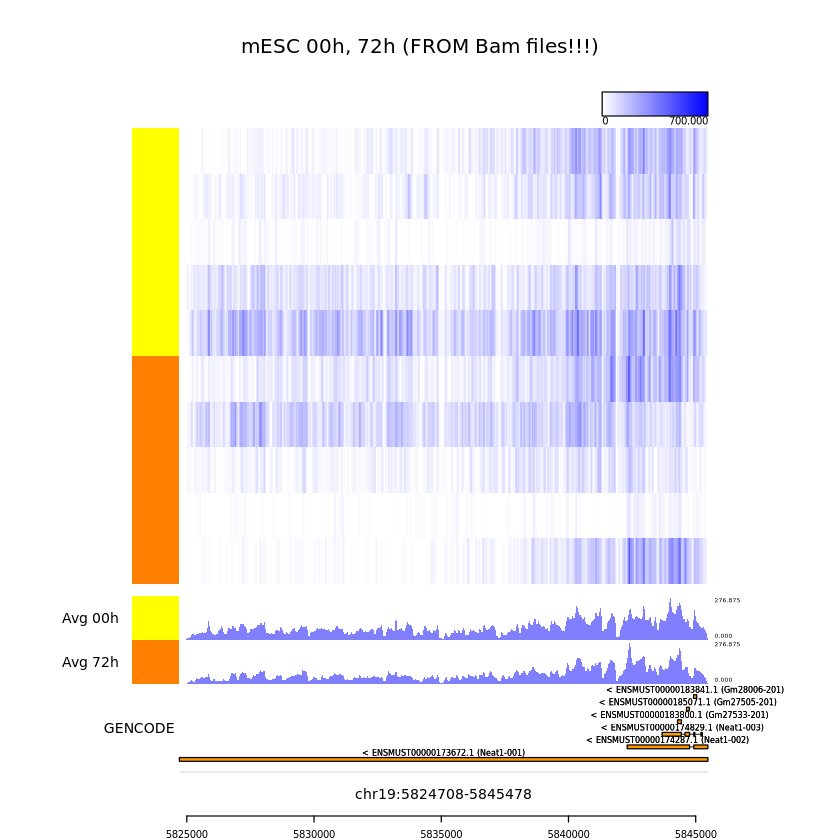

In [18]:
l <- millefyPlot(track_data=tdlist, track_type=tt, heights=heights,
          sc_type = "heatmap",
          chr = chr, start = start, end = end,
          sc_avg = TRUE, sc_avg_height = 1,
          title = text_main)

Works with the BAM files included in the `extdata` if you convert with deepTools' `bamCoverage`!